In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import io
%matplotlib inline

In [2]:
#data1 = io.loadmat('ex7data1.mat')
data2 = io.loadmat('ex7data2.mat')

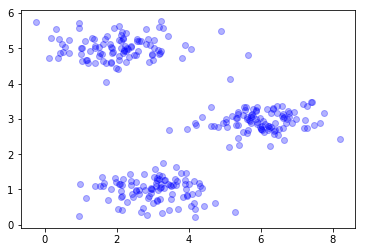

In [3]:
X = data2['X']
pl.scatter(X[:,0], X[:,1], color='b', alpha=0.3)

In [4]:
def kMeanInitCentroids(X,K):
    """return initial coordinates of centroids
    input:
    ------
    K: number of centroids
    X: float array, data set
    
    return:
    -------
    centroids: coordinates of K random points
    """
    centroids = np.zeros((K,X.shape[1]), dtype=float)
    indx = np.random.randint(X.shape[0], size=K)
    centroids = X[indx,:]
    return centroids

In [5]:
def distance(x1,x2):
    """calculate distance between two point in x-y plane
    input:
    ------
    x1, x2: float array, coordinates of two points
    reutrn:
    -------
    dis: float, distance between two points
    """
    dis = np.sqrt( (x1[0]-x2[0])**2 + (x1[1]-x2[1])**2 )
    return dis


In [6]:
def findClosestCentroids(X,centroids):
    K = centroids.shape[0]
    indx = np.zeros((X.shape[0]), dtype=int)
    for i, xi in enumerate(X):
        xcpre = centroids[indx[i],:]
        for k in range(1,K):
            xc = centroids[k,:]
            if ( distance(xi,xc) < distance(xi,xcpre) ):
                 xcpre = xc
                 indx[i] = k
            #endif
        #enddo
    #enddo
    
    return indx

In [7]:
def computeMeans(X,indx,K):
    """compute new means and set of centroids"""
    centroids = np.zeros((K,X.shape[1]), dtype=float)
    for i ,x in enumerate(X):
        centroids[indx[i],:] += x
    #end-do
    for k in range(K):
        centroids[k] = centroids[k]/(np.sum(indx==k))
    return centroids

In [8]:
def runKmean(X,K, max_iters):
    centroids = kMeanInitCentroids(X,K)
    for i in range(max_iters):
        indx = findClosestCentroids(X,centroids)
        centroids = computeMeans(X, indx, K)
    #end-loop
    return centroids

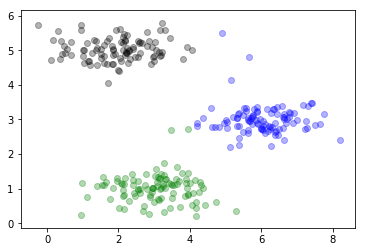

In [9]:
max_iters = 50
K = 3
centroids = runKmean(X, K, max_iters)
indx = findClosestCentroids(X,centroids)
X1 = X[indx==0,:]
X2 = X[indx==1,:]
X3 = X[indx==2,:]
pl.scatter(X1[:,0], X1[:,1], color='b', alpha=0.3)
pl.scatter(X2[:,0], X2[:,1], color='g', alpha=0.3)
pl.scatter(X3[:,0], X3[:,1], color='k', alpha=0.3)

(128, 128, 3)


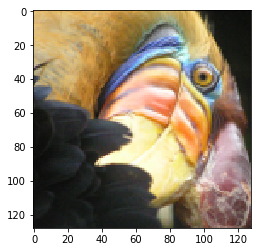

In [10]:
# to read image file
from scipy.misc import imread
A_pic = imread('bird_small.png')
pl.imshow(A_pic)
print(A_pic.shape)
A_1D = A_pic.reshape(A_pic.shape[0]*A_pic.shape[1],A_pic.shape[2])
# normalize values to [0,1]
A_1D = A_1D/255   # 255 max value in RGB

In [11]:
max_iters = 10
K = 32

centroids = runKmean(A_1D,K, max_iters)
indx = findClosestCentroids(A_1D,centroids)
print(centroids)

[[ 0.10262533  0.11170994  0.10052945]
 [ 0.13752535  0.14592743  0.13867929]
 [ 0.77451865  0.59584255  0.36114404]
 [ 0.8319991   0.69493802  0.48093757]
 [ 0.98994315  0.96898016  0.79776308]
 [ 0.9719888   0.87355848  0.68576714]
 [ 0.8656077   0.74401006  0.5349242 ]
 [ 0.3389687   0.3603105   0.40715762]
 [ 0.29668753  0.26197747  0.25195661]
 [ 0.88695425  0.82903007  0.65331242]
 [ 0.42117647  0.292593    0.22213671]
 [ 0.5838684   0.46083657  0.33321064]
 [ 0.52727068  0.60167906  0.65974758]
 [ 0.09024449  0.09740983  0.08753328]
 [ 0.07607575  0.08274108  0.0728457 ]
 [ 0.19547856  0.19115409  0.18728624]
 [ 0.44319185  0.44864201  0.4487239 ]
 [ 0.51676775  0.37604056  0.26680145]
 [ 0.05962114  0.06527639  0.05643625]
 [ 0.98969263  0.8058691   0.65516693]
 [ 0.65537959  0.81395173  0.86732026]
 [ 0.11435102  0.13267172  0.12384217]
 [ 0.23794926  0.22366042  0.22753832]
 [ 0.88768135  0.5088543   0.23415106]
 [ 0.12443732  0.12124819  0.11448844]
 [ 0.97642315  0.72011385

(16384,)
(32, 3)
(128, 128, 3)


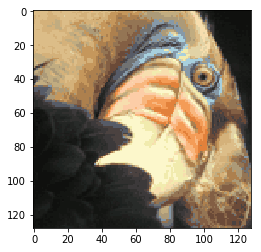

In [12]:
print(indx.shape)
print(centroids.shape)
# Think about this part
img_recovered = centroids[indx,:]
img_recovered = img_recovered.reshape(A_pic.shape[0], A_pic.shape[1], A_pic.shape[2])
print(img_recovered.shape)
pl.imshow(img_recovered)